In [1]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

from pathlib import Path
data = Path('data/data_for_model')

In [2]:
attrs = pd.read_feather(f'{data}/attrs_yearly.feather')

In [3]:
index = pd.read_feather(f'{data}/index_yearly.feather')

In [4]:
index.shape

(740768, 21)

In [5]:
attrs.shape

(740768, 27)

In [6]:
index.head()

,idx,year,albedo_max_,albedo_min_,ndbi_mean_,ndbi_max_,mndwi_mean_,ndbi_count_,mndwi_max_,albedo_mean_,...,mndwi_min_,ndbi_min_,ndvi_count_,ndvi_max_,ndvi_min_,lst_max_,lst_mean_,lst_min_,ndvi_mean_,id_
0,4.782988e+11,2013,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,-1.0,-1.0,...,-1.0,-1.0,3.0,-1.0,-1.0,-128.320053,-128.320048,-128.320053,-1.0,NaN
1,4.782988e+11,2014,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,-1.0,-1.0,...,-1.0,-1.0,3.0,-1.0,-1.0,-128.320053,-128.320048,-128.320053,-1.0,NaN
2,4.782988e+11,2015,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,-1.0,-1.0,...,-1.0,-1.0,3.0,-1.0,-1.0,-128.320053,-128.320048,-128.320053,-1.0,NaN
3,4.782988e+11,2016,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,-1.0,-1.0,...,-1.0,-1.0,3.0,-1.0,-1.0,-128.320053,-128.320048,-128.320053,-1.0,NaN
4,4.782988e+11,2017,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,-1.0,-1.0,...,-1.0,-1.0,3.0,-1.0,-1.0,-128.320053,-128.320048,-128.320053,-1.0,NaN


In [7]:
index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740768 entries, 0 to 740767
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   idx           740768 non-null  float64
 1   year          740768 non-null  int64  
 2   albedo_max_   740768 non-null  float64
 3   albedo_min_   740768 non-null  float64
 4   ndbi_mean_    740768 non-null  float64
 5   ndbi_max_     740768 non-null  float64
 6   mndwi_mean_   740768 non-null  float64
 7   ndbi_count_   740768 non-null  float64
 8   mndwi_max_    740768 non-null  float64
 9   albedo_mean_  740768 non-null  float64
 10  lst_count_    740768 non-null  float64
 11  mndwi_min_    740768 non-null  float64
 12  ndbi_min_     740768 non-null  float64
 13  ndvi_count_   740768 non-null  float64
 14  ndvi_max_     740768 non-null  float64
 15  ndvi_min_     740768 non-null  float64
 16  lst_max_      740768 non-null  float64
 17  lst_mean_     740768 non-null  float64
 18  lst_

In [8]:
attrs.head()

,idx,SHAPE_Area_mean,SHAPE_Area_median,SHAPE_Area_sum,SHAPE_Area_y_mean,SHAPE_Area_y_median,SHAPE_Area_y_sum,SHAPE_Area_y_count,floor_area_mean,floor_area_median,...,BUILDING_HEIGHT_MIN_mean,BUILDING_HEIGHT_MIN_median,BUILDING_HEIGHT_MIN_sum,parcel_boundary_count,floor_number_sum,floor_number_mean,floor_number_median,floor_number_mode,SUBCLASS_mode,year
0,4.782988e+11,NaN,NaN,0.0,NaN,NaN,0.0,0,NaN,NaN,...,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0,2013
1,4.782988e+11,NaN,NaN,0.0,NaN,NaN,0.0,0,NaN,NaN,...,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0,2014
2,4.782988e+11,NaN,NaN,0.0,NaN,NaN,0.0,0,NaN,NaN,...,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0,2015
3,4.782988e+11,NaN,NaN,0.0,NaN,NaN,0.0,0,NaN,NaN,...,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0,2016
4,4.782988e+11,NaN,NaN,0.0,NaN,NaN,0.0,0,NaN,NaN,...,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0,2017


In [9]:
index_attr = pd.merge(left=index, right=attrs, on=['idx', 'year'])

In [10]:
index_attr.head()

,idx,year,albedo_max_,albedo_min_,ndbi_mean_,ndbi_max_,mndwi_mean_,ndbi_count_,mndwi_max_,albedo_mean_,...,bsc_sum,BUILDING_HEIGHT_MIN_mean,BUILDING_HEIGHT_MIN_median,BUILDING_HEIGHT_MIN_sum,parcel_boundary_count,floor_number_sum,floor_number_mean,floor_number_median,floor_number_mode,SUBCLASS_mode
0,4.782988e+11,2013,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,-1.0,-1.0,...,0.0,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0
1,4.782988e+11,2014,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,-1.0,-1.0,...,0.0,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0
2,4.782988e+11,2015,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,-1.0,-1.0,...,0.0,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0
3,4.782988e+11,2016,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,-1.0,-1.0,...,0.0,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0
4,4.782988e+11,2017,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,-1.0,-1.0,...,0.0,NaN,NaN,0.0,0,0.0,NaN,NaN,0.0,0


In [11]:
index_attr.to_feather(f'{data}/index_attrs_yearly.feather')
index_attr.to_csv(f'{data}/index_attrs_yearly.csv')

In [12]:
index_attr = pd.read_feather(f'{data}/index_attrs_yearly.feather')

In [13]:
df_2020 = index_attr[index_attr.year == 2020]

In [14]:
df_2020.shape

(92596, 46)

In [15]:
corr = df_2020.corr()

<AxesSubplot:>

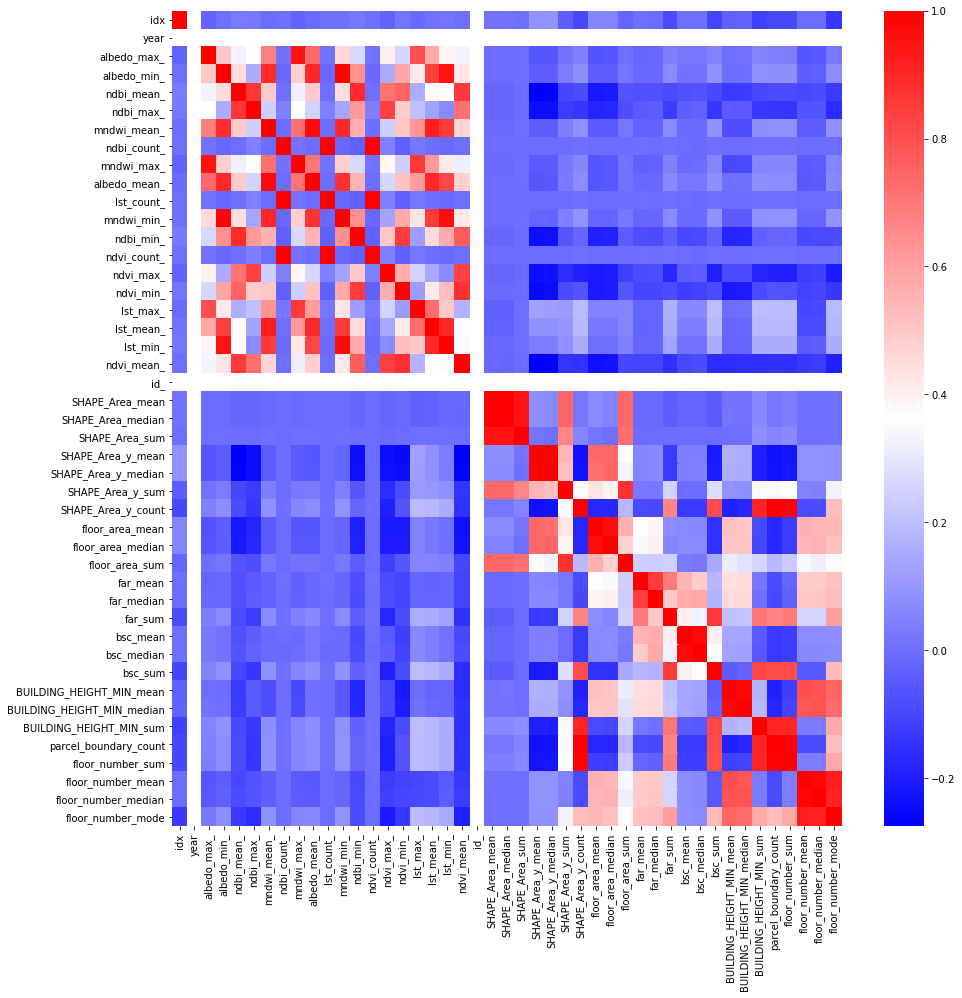

In [16]:
fig, ax = plt.subplots(1,1, figsize=(15, 15))
sns.heatmap(data=corr, cmap='bwr', ax=ax)

In [17]:
corr.lst_max_.to_frame().style.background_gradient(cmap='RdYlGn')

,lst_max_
idx,-0.008312
year,nan
albedo_max_,0.802742
albedo_min_,0.422472
ndbi_mean_,0.160859
ndbi_max_,0.204885
mndwi_mean_,0.629476
ndbi_count_,0.021644
mndwi_max_,0.857601
albedo_mean_,0.607058


In [18]:
corr.lst_mean_.to_frame().style.background_gradient(cmap='RdYlGn')

,lst_mean_
idx,0.009658
year,nan
albedo_max_,0.577281
albedo_min_,0.836980
ndbi_mean_,0.373322
ndbi_max_,0.129116
mndwi_mean_,0.927992
ndbi_count_,0.002306
mndwi_max_,0.620431
albedo_mean_,0.896593


In [19]:
gdf = gpd.read_feather(f'{data}/grid.feather')

In [20]:
gdf.to_file(f'{data}/grid.geojson', driver='GeoJSON')

In [21]:
gdf.shape

(92596, 6)